In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("24BAD056")
print("kalvi kannan b")

24BAD056
kalvi kannan b


In [50]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
X = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']]
y = df['diagnosis']

le = LabelEncoder()
y = le.fit_transform(y)


In [52]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [53]:
k_list = range(1, 16)
accuracy_list = []

for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, pred))

best_k = k_list[np.argmax(accuracy_list)]
print("Best K:", best_k)

Best K: 11


In [54]:

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9649122807017544
Precision: 0.9534883720930233
Recall: 0.9534883720930233
F1 Score: 0.9534883720930233


In [55]:
mis = np.where(y_test != y_pred)
print("Number of misclassified samples:", len(mis[0]))


Number of misclassified samples: 4


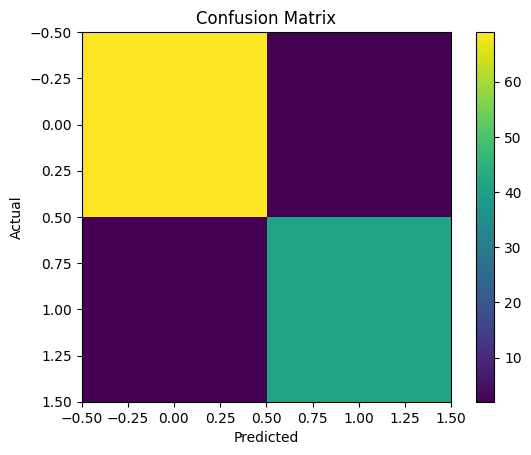

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

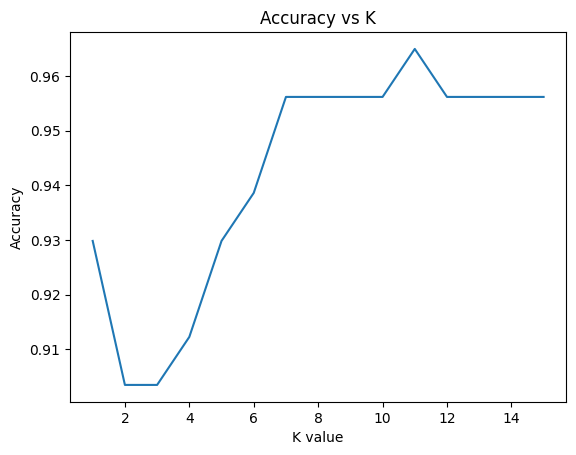

In [57]:
plt.plot(k_list, accuracy_list)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

In [58]:
X2 = df[['radius_mean','texture_mean']]
X2 = scaler.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

model2 = KNeighborsClassifier(n_neighbors=best_k)
model2.fit(X2_train, y2_train)

x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

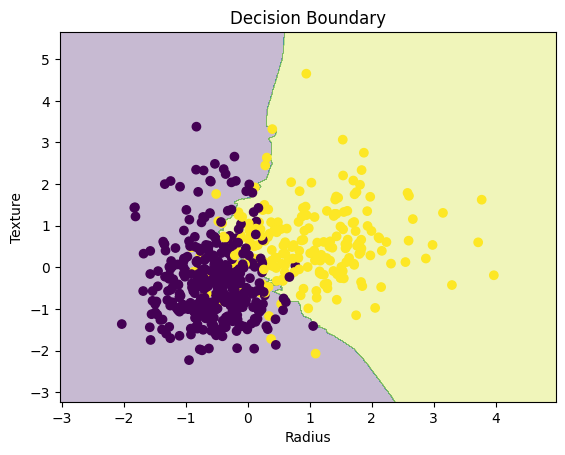

In [59]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2[:,0], X2[:,1], c=y)
plt.xlabel("Radius")
plt.ylabel("Texture")
plt.title("Decision Boundary")
plt.show()